In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [66]:
df=pd.read_csv('Carbon Emission.csv')

In [67]:
df.corr()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
Monthly Grocery Bill,1.000000,0.015801,0.002343,-0.010318,0.006746,0.012798,0.081587
Vehicle Monthly Distance Km,0.015801,1.000000,-0.001730,-0.003943,0.004934,-0.003497,0.594171
Waste Bag Weekly Count,0.002343,-0.001730,1.000000,-0.011640,-0.003254,-0.005335,0.159193
How Long TV PC Daily Hour,-0.010318,-0.003943,-0.011640,1.000000,0.009414,0.006804,0.012985
How Many New Clothes Monthly,0.006746,0.004934,-0.003254,0.009414,1.000000,0.006426,0.198887
How Long Internet Daily Hour,0.012798,-0.003497,-0.005335,0.006804,0.006426,1.000000,0.043878
CarbonEmission,0.081587,0.594171,0.159193,0.012985,0.198887,0.043878,1.000000


In [68]:
df.shape

(10000, 20)

In [69]:
Recycling = set()
for row in df['Recycling']:
    names = row.strip('[]').split(',')
    Recycling.update([name.strip() for name in names])

print("Unique names:", Recycling)

Unique names: {'', "'Plastic'", "'Metal'", "'Paper'", "'Glass'"}


In [70]:
unique_names = ['Microwave','Airfryer','Oven','Stove','Grill']

for name in unique_names:
    df[name] = df['Cooking_With'].str.contains(name).astype(int)

df.drop('Cooking_With', axis=1, inplace=True)

In [71]:
unique_names = ['Plastic','Paper','Metal','Glass']

for name in unique_names:
    df[name] = df['Recycling'].str.contains(name).astype(int)

df.drop('Recycling', axis=1, inplace=True)

In [72]:
df.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,...,CarbonEmission,Microwave,Airfryer,Oven,Stove,Grill,Plastic,Paper,Metal,Glass
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,...,2238,0,0,1,1,0,0,0,1,0
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,...,1892,1,0,0,1,0,0,0,1,0
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,...,2595,1,0,1,0,0,0,0,1,0
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,...,1074,1,1,0,0,1,1,1,1,1
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,...,4743,0,0,1,0,0,0,1,0,0


In [73]:
df.isna().sum()

Body Type                           0
Sex                                 0
Diet                                0
How Often Shower                    0
Heating Energy Source               0
Transport                           0
Vehicle Type                     6721
Social Activity                     0
Monthly Grocery Bill                0
Frequency of Traveling by Air       0
Vehicle Monthly Distance Km         0
Waste Bag Size                      0
Waste Bag Weekly Count              0
How Long TV PC Daily Hour           0
How Many New Clothes Monthly        0
How Long Internet Daily Hour        0
Energy efficiency                   0
CarbonEmission                      0
Microwave                           0
Airfryer                            0
Oven                                0
Stove                               0
Grill                               0
Plastic                             0
Paper                               0
Metal                               0
Glass       

In [74]:
df['Vehicle Type']=df['Vehicle Type'].fillna('no_vehicle')

In [75]:
df.shape

(10000, 27)

In [76]:
columns_to_encode = ['Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source',
       'Transport', 'Vehicle Type', 'Social Activity',
       'Frequency of Traveling by Air',
       'Waste Bag Size',
       'Energy efficiency']  # Add your column names here
mapping_dict = {}

# Manually encode categorical columns
for col in columns_to_encode:
    # Create a dictionary to map categories to numerical labels
    label_map = {val: idx for idx, val in enumerate(df[col].unique())}
    
    # Update the mapping dictionary
    mapping_dict[col] = label_map
    
    # Apply the mapping to the column
    df[col + '_encoded'] = df[col].map(label_map)

    # Drop the original column
    df.drop(columns=[col], inplace=True)


# Display the mapping dictionary
print("\nMapping Dictionary:")
for col, mapping in mapping_dict.items():
    print(f"{col}: {mapping}")



Mapping Dictionary:
Body Type: {'overweight': 0, 'obese': 1, 'underweight': 2, 'normal': 3}
Sex: {'female': 0, 'male': 1}
Diet: {'pescatarian': 0, 'vegetarian': 1, 'omnivore': 2, 'vegan': 3}
How Often Shower: {'daily': 0, 'less frequently': 1, 'more frequently': 2, 'twice a day': 3}
Heating Energy Source: {'coal': 0, 'natural gas': 1, 'wood': 2, 'electricity': 3}
Transport: {'public': 0, 'walk/bicycle': 1, 'private': 2}
Vehicle Type: {'no_vehicle': 0, 'petrol': 1, 'diesel': 2, 'hybrid': 3, 'lpg': 4, 'electric': 5}
Social Activity: {'often': 0, 'never': 1, 'sometimes': 2}
Frequency of Traveling by Air: {'frequently': 0, 'rarely': 1, 'never': 2, 'very frequently': 3}
Waste Bag Size: {'large': 0, 'extra large': 1, 'small': 2, 'medium': 3}
Energy efficiency: {'No': 0, 'Sometimes': 1, 'Yes': 2}



Mapping Dictionary:
Body Type: {'overweight': 0, 'obese': 1, 'underweight': 2, 'normal': 3}
Sex: {'female': 0, 'male': 1}
Diet: {'pescatarian': 0, 'vegetarian': 1, 'omnivore': 2, 'vegan': 3}
How Often Shower: {'daily': 0, 'less frequently': 1, 'more frequently': 2, 'twice a day': 3}
Heating Energy Source: {'coal': 0, 'natural gas': 1, 'wood': 2, 'electricity': 3}
Transport: {'public': 0, 'walk/bicycle': 1, 'private': 2}
Vehicle Type: {'no_vehicle': 0, 'petrol': 1, 'diesel': 2, 'hybrid': 3, 'lpg': 4, 'electric': 5}
Social Activity: {'often': 0, 'never': 1, 'sometimes': 2}
Frequency of Traveling by Air: {'frequently': 0, 'rarely': 1, 'never': 2, 'very frequently': 3}
Waste Bag Size: {'large': 0, 'extra large': 1, 'small': 2, 'medium': 3}
Energy efficiency: {'No': 0, 'Sometimes': 1, 'Yes': 2}

In [77]:
df.head()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission,Microwave,Airfryer,Oven,...,Sex_encoded,Diet_encoded,How Often Shower_encoded,Heating Energy Source_encoded,Transport_encoded,Vehicle Type_encoded,Social Activity_encoded,Frequency of Traveling by Air_encoded,Waste Bag Size_encoded,Energy efficiency_encoded
0,230,210,4,7,26,1,2238,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,114,9,3,9,38,5,1892,1,0,0,...,0,1,1,1,1,0,0,1,1,0
2,138,2472,1,14,47,6,2595,1,0,1,...,1,2,2,2,2,1,1,2,2,1
3,157,74,3,20,5,7,1074,1,1,0,...,1,2,3,2,1,0,2,1,3,1
4,266,8457,1,3,5,6,4743,0,0,1,...,0,1,0,0,2,2,0,3,0,2


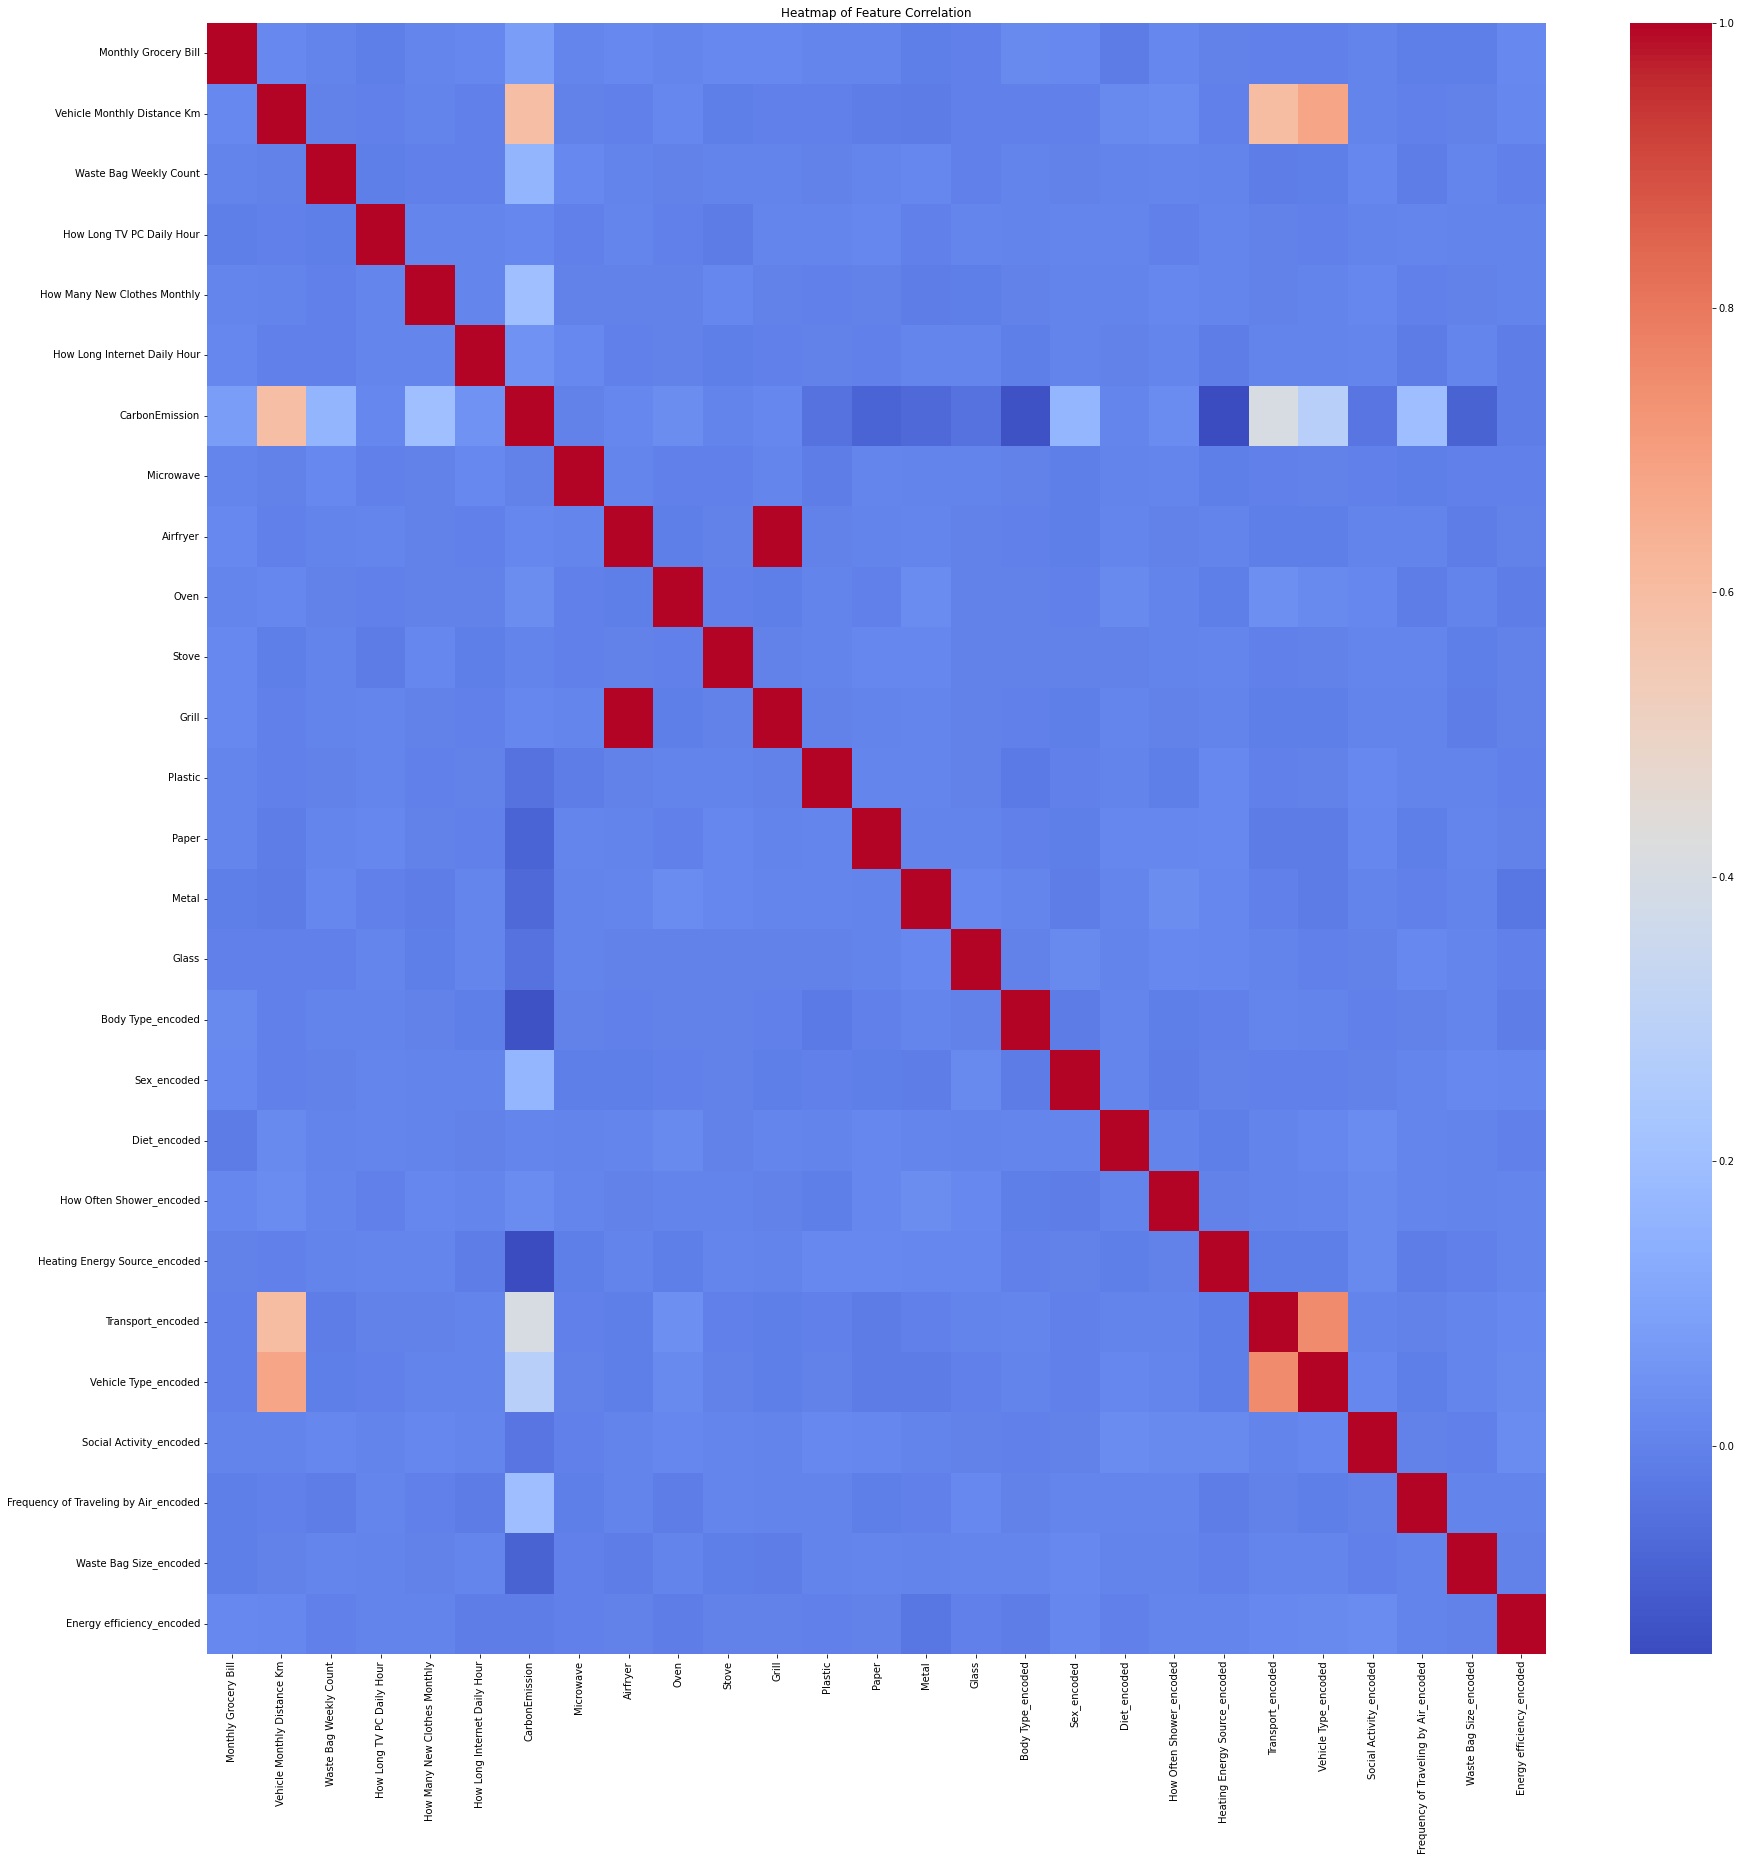

In [78]:



# Calculate correlations
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(corr, cmap='coolwarm')

plt.title('Heatmap of Feature Correlation')
plt.show()

In [81]:
df.describe()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission,Microwave,Airfryer,Oven,...,Sex_encoded,Diet_encoded,How Often Shower_encoded,Heating Energy Source_encoded,Transport_encoded,Vehicle Type_encoded,Social Activity_encoded,Frequency of Traveling by Air_encoded,Waste Bag Size_encoded,Energy efficiency_encoded
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000,...,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,173.875200,2031.485900,4.024600,12.139200,25.109000,11.889100,2269.147300,0.507300,0.499200,0.505,...,0.499300,1.493200,1.493700,1.50440,0.99850,0.996000,0.995600,1.501500,1.497200,1.009500
std,72.234018,2769.715597,1.990375,7.106369,14.698725,7.277218,1017.675247,0.499972,0.500024,0.500,...,0.500025,1.122622,1.123604,1.12477,0.81078,1.640809,0.812063,1.123799,1.115848,0.808502
min,50.000000,0.000000,1.000000,0.000000,0.000000,0.000000,306.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,111.000000,69.000000,2.000000,6.000000,13.000000,6.000000,1538.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,173.000000,823.000000,4.000000,12.000000,25.000000,12.000000,2080.000000,1.000000,0.000000,1.000,...,0.000000,1.000000,1.000000,2.00000,1.00000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,237.000000,2516.750000,6.000000,18.000000,38.000000,18.000000,2768.000000,1.000000,1.000000,1.000,...,1.000000,2.000000,3.000000,3.00000,2.00000,2.000000,2.000000,3.000000,2.000000,2.000000
max,299.000000,9999.000000,7.000000,24.000000,50.000000,24.000000,8377.000000,1.000000,1.000000,1.000,...,1.000000,3.000000,3.000000,3.00000,2.00000,5.000000,2.000000,3.000000,3.000000,2.000000


In [82]:
df.corr()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission,Microwave,Airfryer,Oven,...,Sex_encoded,Diet_encoded,How Often Shower_encoded,Heating Energy Source_encoded,Transport_encoded,Vehicle Type_encoded,Social Activity_encoded,Frequency of Traveling by Air_encoded,Waste Bag Size_encoded,Energy efficiency_encoded
Monthly Grocery Bill,1.000000,0.015801,0.002343,-0.010318,0.006746,0.012798,0.081587,0.007364,0.015589,0.008144,...,0.015877,-0.016954,0.013727,0.000248,-0.006164,-0.004022,0.004384,-0.008655,-0.009834,0.018164
Vehicle Monthly Distance Km,0.015801,1.000000,-0.001730,-0.003943,0.004934,-0.003497,0.594171,-0.001789,-0.006986,0.014096,...,-0.006622,0.019854,0.024004,-0.005421,0.598465,0.679202,0.002052,-0.007425,-0.001902,0.012017
Waste Bag Weekly Count,0.002343,-0.001730,1.000000,-0.011640,-0.003254,-0.005335,0.159193,0.015698,0.004441,-0.002736,...,-0.001390,0.005043,0.009326,0.003034,-0.015966,-0.011637,0.011452,-0.013743,0.009172,-0.003688
How Long TV PC Daily Hour,-0.010318,-0.003943,-0.011640,1.000000,0.009414,0.006804,0.012985,-0.006901,0.007687,-0.004840,...,0.006698,0.010185,-0.005151,0.008006,0.000626,-0.007234,0.003832,0.008840,0.005182,0.003460
How Many New Clothes Monthly,0.006746,0.004934,-0.003254,0.009414,1.000000,0.006426,0.198887,0.001185,0.001019,-0.000755,...,0.001684,0.003887,0.014260,0.007085,-0.000372,0.004559,0.012474,-0.004194,-0.000561,0.004205
How Long Internet Daily Hour,0.012798,-0.003497,-0.005335,0.006804,0.006426,1.000000,0.043878,0.018790,-0.003226,0.001128,...,0.001834,-0.002914,0.006073,-0.013326,0.002463,0.001713,0.009327,-0.017180,0.006224,-0.012501
CarbonEmission,0.081587,0.594171,0.159193,0.012985,0.198887,0.043878,1.000000,0.000106,0.013660,0.032518,...,0.163895,0.007327,0.026564,-0.146310,0.403990,0.282960,-0.038273,0.196863,-0.083943,-0.013712
Microwave,0.007364,-0.001789,0.015698,-0.006901,0.001185,0.018790,0.000106,1.000000,0.007024,-0.003947,...,-0.007980,0.003563,0.008983,-0.009750,-0.006264,-0.000696,-0.003616,-0.011589,-0.006686,-0.005491
Airfryer,0.015589,-0.006986,0.004441,0.007687,0.001019,-0.003226,0.013660,0.007024,1.000000,-0.009985,...,-0.008602,0.010324,-0.001166,0.003385,-0.007527,-0.009268,0.002947,0.005252,-0.012013,0.000637
Oven,0.008144,0.014096,-0.002736,-0.004840,-0.000755,0.001128,0.032518,-0.003947,-0.009985,1.000000,...,-0.005386,0.020016,0.004595,-0.007508,0.034187,0.020504,0.012616,-0.012561,0.002535,-0.015827


In [84]:
# removing column whose correlation with 'Carbon emmision' is very low
df=df.drop(columns=['How Long TV PC Daily Hour','How Long Internet Daily Hour'])

In [85]:
df.head()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Many New Clothes Monthly,CarbonEmission,Microwave,Airfryer,Oven,Stove,Grill,...,Sex_encoded,Diet_encoded,How Often Shower_encoded,Heating Energy Source_encoded,Transport_encoded,Vehicle Type_encoded,Social Activity_encoded,Frequency of Traveling by Air_encoded,Waste Bag Size_encoded,Energy efficiency_encoded
0,230,210,4,26,2238,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,114,9,3,38,1892,1,0,0,1,0,...,0,1,1,1,1,0,0,1,1,0
2,138,2472,1,47,2595,1,0,1,0,0,...,1,2,2,2,2,1,1,2,2,1
3,157,74,3,5,1074,1,1,0,0,1,...,1,2,3,2,1,0,2,1,3,1
4,266,8457,1,5,4743,0,0,1,0,0,...,0,1,0,0,2,2,0,3,0,2


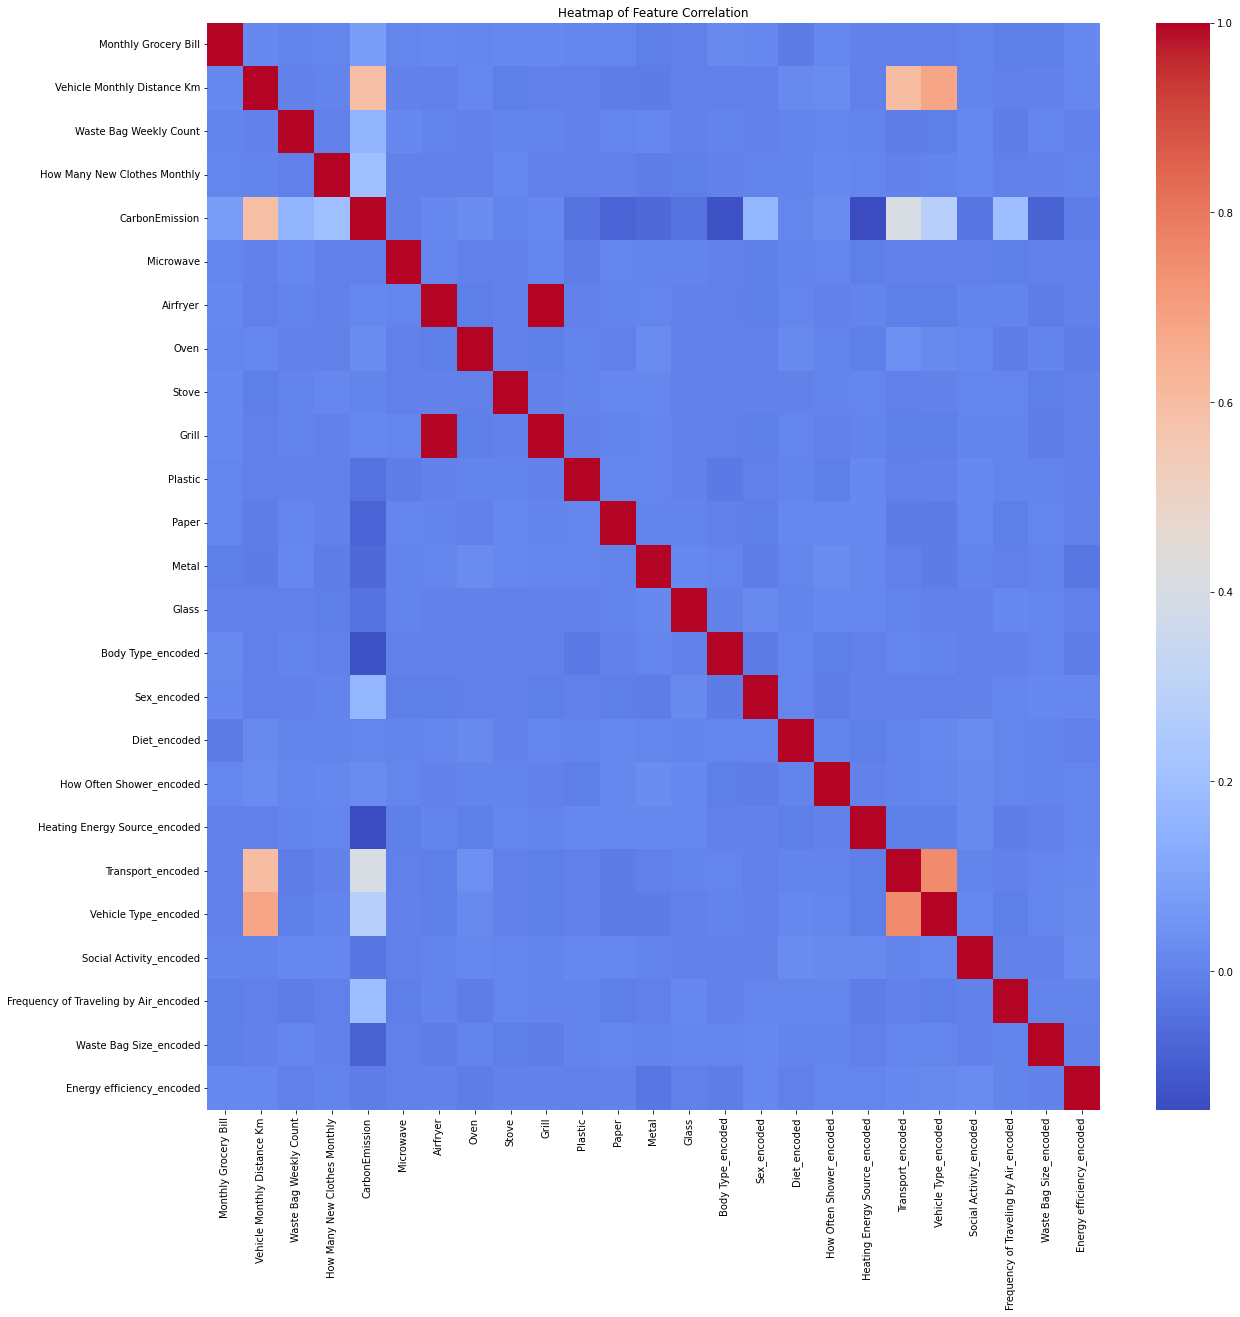

In [93]:
# Calculate correlations
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr, cmap='coolwarm')

plt.title('Heatmap of Feature Correlation')
plt.show()

In [91]:

# normalization
columns_to_encode = ['Monthly Grocery Bill', 'Vehicle Monthly Distance Km', 'Waste Bag Weekly Count',
                     'How Many New Clothes Monthly']  # Add your column names here


# Manually encode categorical columns
for col in columns_to_encode:
   # Find the maximum value in the column
    max_value = df[col].max()
    
    # Divide each value in the column by its maximum value
    df[col] = df[col] / max_value


In [95]:
df.head()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Many New Clothes Monthly,CarbonEmission,Microwave,Airfryer,Oven,Stove,Grill,...,Sex_encoded,Diet_encoded,How Often Shower_encoded,Heating Energy Source_encoded,Transport_encoded,Vehicle Type_encoded,Social Activity_encoded,Frequency of Traveling by Air_encoded,Waste Bag Size_encoded,Energy efficiency_encoded
0,0.769231,0.021002,0.571429,0.52,2238,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.381271,0.000900,0.428571,0.76,1892,1,0,0,1,0,...,0,1,1,1,1,0,0,1,1,0
2,0.461538,0.247225,0.142857,0.94,2595,1,0,1,0,0,...,1,2,2,2,2,1,1,2,2,1
3,0.525084,0.007401,0.428571,0.10,1074,1,1,0,0,1,...,1,2,3,2,1,0,2,1,3,1
4,0.889632,0.845785,0.142857,0.10,4743,0,0,1,0,0,...,0,1,0,0,2,2,0,3,0,2


In [96]:
# moving CarbonEmission column at last

# Extract the column
column_to_move = df.pop('CarbonEmission')

# Re-insert the column at the last position
df['CarbonEmission'] = column_to_move

In [97]:
df.head()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Many New Clothes Monthly,Microwave,Airfryer,Oven,Stove,Grill,Plastic,...,Diet_encoded,How Often Shower_encoded,Heating Energy Source_encoded,Transport_encoded,Vehicle Type_encoded,Social Activity_encoded,Frequency of Traveling by Air_encoded,Waste Bag Size_encoded,Energy efficiency_encoded,CarbonEmission
0,0.769231,0.021002,0.571429,0.52,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,2238
1,0.381271,0.000900,0.428571,0.76,1,0,0,1,0,0,...,1,1,1,1,0,0,1,1,0,1892
2,0.461538,0.247225,0.142857,0.94,1,0,1,0,0,0,...,2,2,2,2,1,1,2,2,1,2595
3,0.525084,0.007401,0.428571,0.10,1,1,0,0,1,1,...,2,3,2,1,0,2,1,3,1,1074
4,0.889632,0.845785,0.142857,0.10,0,0,1,0,0,0,...,1,0,0,2,2,0,3,0,2,4743
